#importing the libraries required

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

#reading dataset

In [52]:
data1 = pd.read_csv('BlinkIT Grocery Data.csv', encoding='unicode_escape')

#datadefiniton

In [53]:
data1.shape


(8523, 12)

In [54]:
data1.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
data1.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [57]:
data1.dtypes


Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [58]:
summary_stats = data1.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
        Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000  7060.000000  8523.000000   
mean                 2016.450546         0.066132    12.857645   140.992783   
std                     3.189396         0.051598     4.643456    62.275067   
min                  2011.000000         0.000000     4.555000    31.290000   
25%                  2014.000000         0.026989     8.773750    93.826500   
50%                  2016.000000         0.053931    12.600000   143.012800   
75%                  2018.000000         0.094585    16.850000   185.643700   
max                  2022.000000         0.328391    21.350000   266.888400   

            Rating  
count  8523.000000  
mean      3.965857  
std       0.605651  
min       1.000000  
25%       4.000000  
50%       4.000000  
75%       4.200000  
max       5.000000  


#checking for duplicate rows

In [59]:
duplicate_rows = data1[data1.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape)


Number of duplicate rows: (0, 12)


#check for missing values


In [60]:
missing_values = data1.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


#feature engineering 

In [61]:
current_year = 2024  # Assuming the current year is 2024
data1['Age_of_Outlet'] = current_year - data1['Outlet Establishment Year']

In [62]:
data1.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Age_of_Outlet
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,12
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,2
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,8
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,10
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,9
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0,4
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0,13
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0,9
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0,10
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0,6


#Example of binning Item Weight into categories

In [63]:
bins = [0, 10, 20, 30, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
data1['Item_Weight_Category'] = pd.cut(data1['Item Weight'], bins=bins, labels=labels)


In [64]:
summary_stats = data1.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
        Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000  7060.000000  8523.000000   
mean                 2016.450546         0.066132    12.857645   140.992783   
std                     3.189396         0.051598     4.643456    62.275067   
min                  2011.000000         0.000000     4.555000    31.290000   
25%                  2014.000000         0.026989     8.773750    93.826500   
50%                  2016.000000         0.053931    12.600000   143.012800   
75%                  2018.000000         0.094585    16.850000   185.643700   
max                  2022.000000         0.328391    21.350000   266.888400   

            Rating  Age_of_Outlet  
count  8523.000000    8523.000000  
mean      3.965857       7.549454  
std       0.605651       3.189396  
min       1.000000       2.000000  
25%       4.000000       6.000000  
50%       4.000000       8.000000  
75%       4.20

In [65]:
data1.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Age_of_Outlet,Item_Weight_Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,12,Medium
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,2,Medium
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,8,Medium
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,10,Medium
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,9,Medium
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0,4,Low
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0,13,Medium
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0,9,Medium
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0,10,High
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0,6,NaN


#data cleaning

#fill the missing data with mean value of column

In [66]:
data1['Item Weight'].fillna(data1['Item Weight'].mean(), inplace=True)

In [67]:
data1.head(100)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Age_of_Outlet,Item_Weight_Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0,12,Medium
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.800000,115.3492,5.0,2,Medium
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.850000,165.0210,5.0,8,Medium
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.150000,126.5046,5.0,10,Medium
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.600000,55.1614,5.0,9,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Low Fat,FDS55,Fruits and Vegetables,2018,OUT019,Tier 1,Small,Grocery Store,0.142108,12.857645,150.3734,5.0,6,NaN
96,Low Fat,FDZ56,Fruits and Vegetables,2018,OUT019,Tier 1,Small,Grocery Store,0.045062,12.857645,167.5474,5.0,6,NaN
97,Low Fat,NCA05,Health and Hygiene,2018,OUT019,Tier 1,Small,Grocery Store,0.044000,12.857645,148.2734,5.0,6,NaN
98,Low Fat,NCK29,Health and Hygiene,2018,OUT019,Tier 1,Small,Grocery Store,0.000000,12.857645,123.4730,5.0,6,NaN


#skewness for numerical features

In [68]:
skewness = data1.select_dtypes(include=np.number).apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
print("\nSkewness of numerical features:\n", skewness)


Skewness of numerical features:
 Item Visibility    1.166884
Rating            -2.188591
dtype: float64


In [69]:
data1['Item Visibility'] = np.log1p(data1['Item Visibility']) #to remove right skewness

#histogram for numerical feature

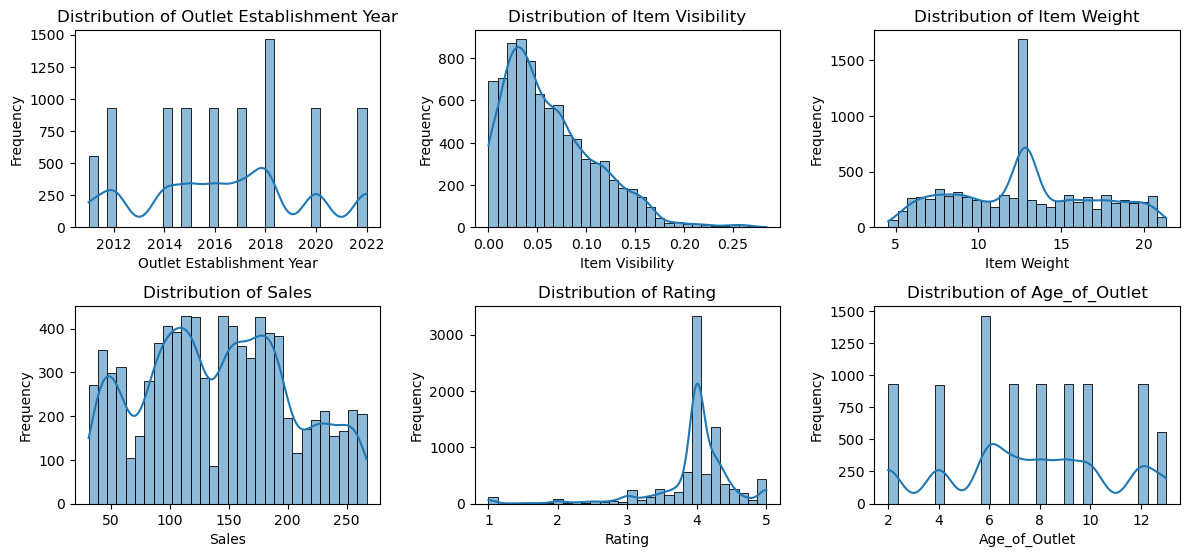

In [70]:

plt.figure(figsize=(12, 8))
for i, col in enumerate(data1.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data1[col], bins=30, kde=True)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#boxplot for outliers

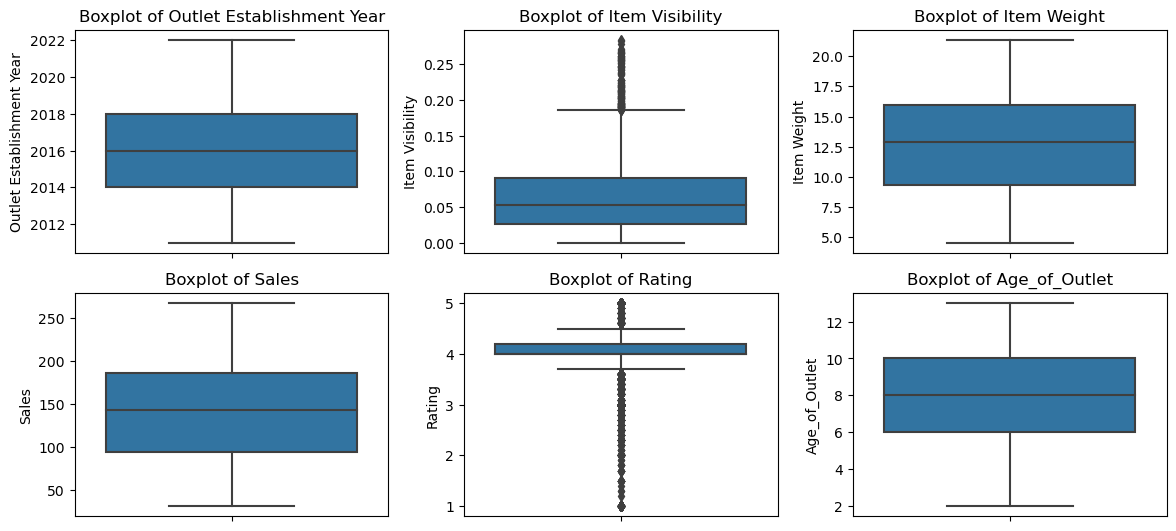

In [71]:

plt.figure(figsize=(12, 8))
for i, col in enumerate(data1.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data1[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

#detecting outliers

In [72]:

outliers = {}
for col in data1.select_dtypes(include=np.number).columns:
    q1 = data1[col].quantile(0.25)
    q3 = data1[col].quantile(0.75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    outliers[col] = data1[(data1[col] < q1 - outlier_step) | (data1[col] > q3 + outlier_step)].index.tolist()

print("\nOutliers:\n", outliers)


Outliers:
 {'Outlet Establishment Year': [], 'Item Visibility': [93, 109, 294, 303, 312, 316, 317, 558, 562, 745, 876, 877, 1032, 1033, 1037, 1038, 1165, 1171, 1176, 1177, 1336, 1434, 1437, 1438, 1440, 1456, 1457, 1459, 1465, 1470, 1726, 1728, 1737, 1740, 2120, 2135, 2143, 2144, 2438, 2447, 2449, 2450, 2462, 2468, 2764, 2765, 2768, 2995, 3010, 3019, 3023, 3024, 3195, 3210, 3316, 3322, 3323, 3335, 3343, 3601, 3604, 3605, 3899, 3900, 3903, 4176, 4177, 4182, 4185, 4188, 4620, 4625, 4758, 4767, 4854, 4863, 4999, 5023, 5133, 5205, 5222, 5264, 5265, 5271, 5419, 5447, 5573, 5638, 5847, 5878, 5968, 5991, 6110, 6427, 6436, 6442, 6450, 6466, 6477, 6490, 6492, 6494, 6502, 6520, 6540, 6543, 6550, 6557, 6558, 6561, 6566, 7586, 7592, 7604, 7615, 7627, 7628, 7638, 7648, 7666, 7668, 7669, 7672, 7675, 7680, 7683, 7695, 7708, 7716, 7719, 7720], 'Item Weight': [], 'Sales': [], 'Rating': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,

#EDA AND INFERENCES AND SUGGESTIONS WITHDRAWN 

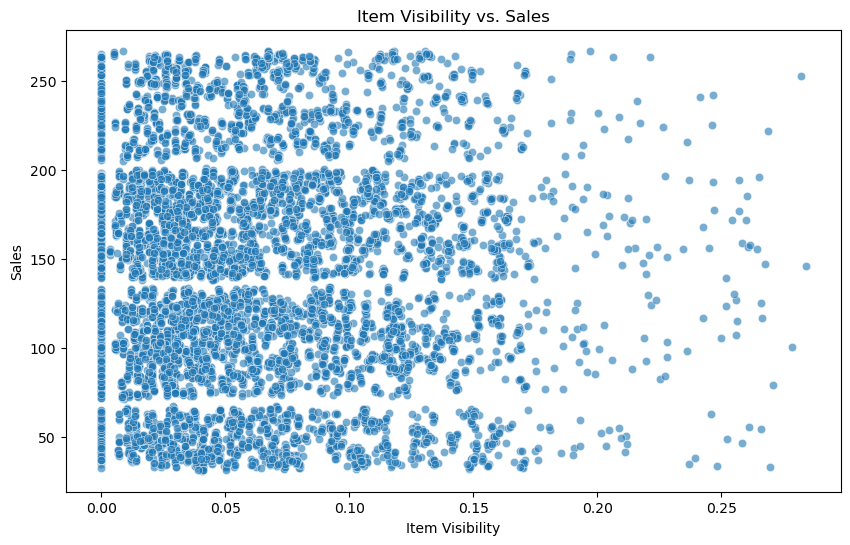


The scatter plot helps identify if there's a correlation between item visibility and sales. Points clustering towards the lower visibility and lower sales might indicate opportunities for increasing visibility to boost sales.



In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Visibility', y='Sales', data=data1, alpha=0.6)

plt.title('Item Visibility vs. Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()
print("\nThe scatter plot helps identify if there's a correlation between item visibility and sales. Points clustering towards the lower visibility and lower sales might indicate opportunities for increasing visibility to boost sales.\n")

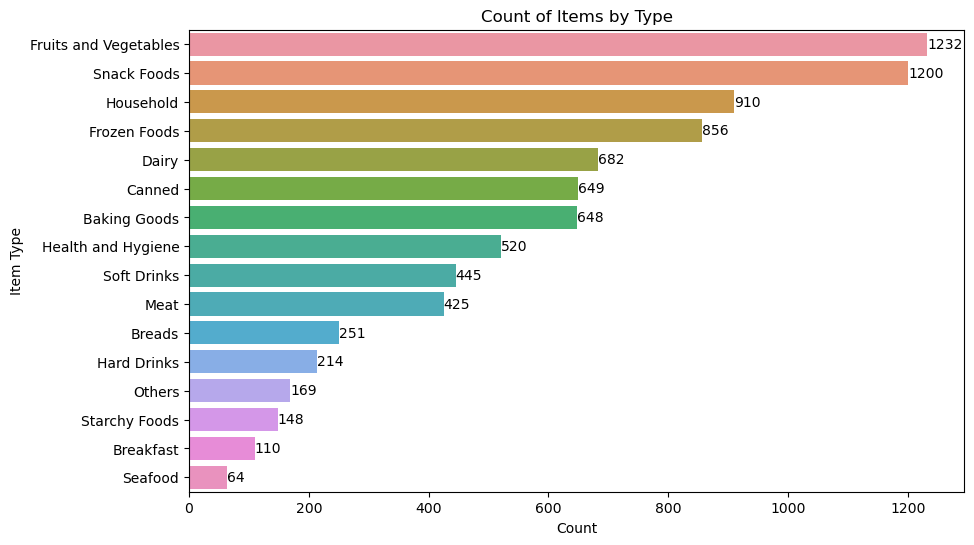

The count plot displays the frequency of each item type. It emphasizes which categories (e.g., Fruits and Vegetables, Snack Foods) are most prevalent, guiding decisions on product assortment and diversification strategies.


In [74]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(y='Item Type', data=data1, order=data1['Item Type'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Items by Type')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.show()

print("The count plot displays the frequency of each item type. It emphasizes which categories (e.g., Fruits and Vegetables, Snack Foods) are most prevalent, guiding decisions on product assortment and diversification strategies.")

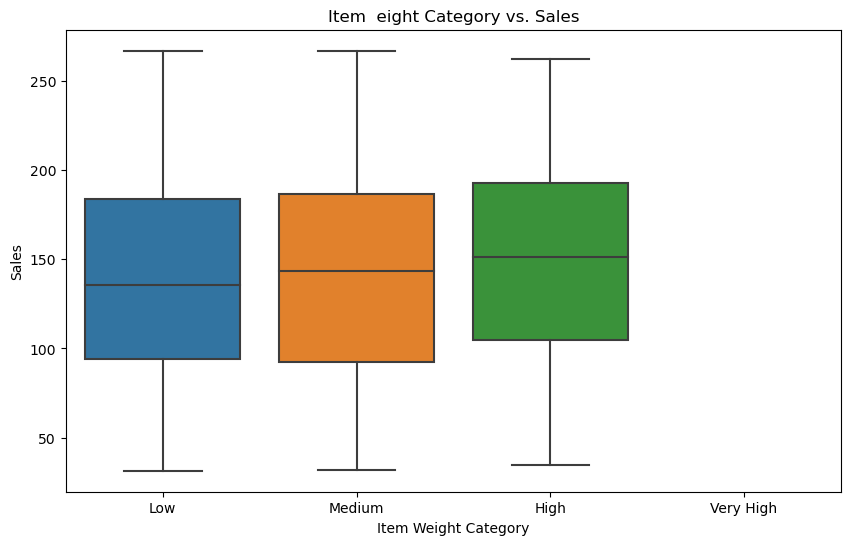

the box plot illustrates how different item weight categories (e.g., Low, Medium, High, Very High) relate to sales. 'Very High' weight products show higher median sales, indicating potential profitability in this category.


In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Weight_Category', y='Sales', data=data1, order=labels)

plt.title('Item  eight Category vs. Sales')
plt.xlabel('Item Weight Category')
plt.ylabel('Sales')
plt.show()
print("the box plot illustrates how different item weight categories (e.g., Low, Medium, High, Very High) relate to sales. 'Very High' weight products show higher median sales, indicating potential profitability in this category.")

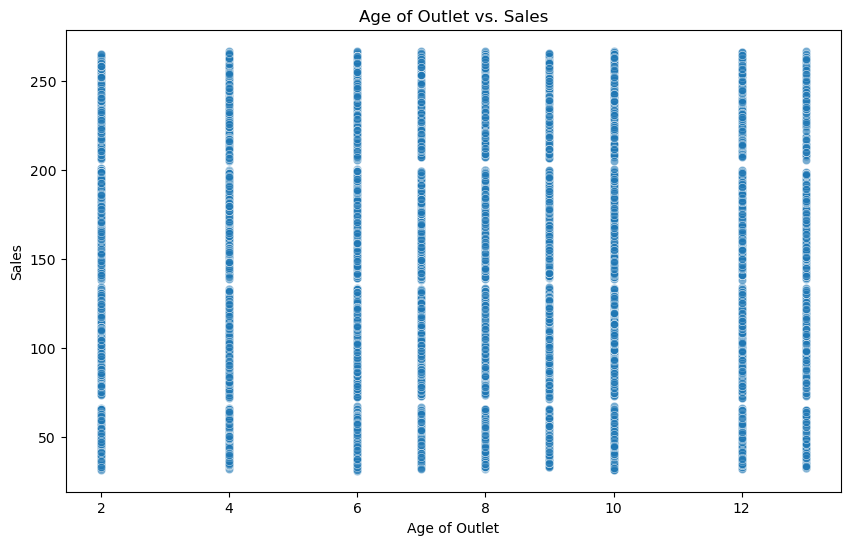

This scatter plot helps visualize the relationship between the age of outlets and their sales performance. It provides insights into whether older outlets tend to have higher or lower sales, suggesting potential strategies for rejuvenation.


In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_of_Outlet', y='Sales', data=data1, alpha=0.6)
plt.title('Age of Outlet vs. Sales')
plt.xlabel('Age of Outlet')
plt.ylabel('Sales')
plt.show()
print("This scatter plot helps visualize the relationship between the age of outlets and their sales performance. It provides insights into whether older outlets tend to have higher or lower sales, suggesting potential strategies for rejuvenation.")


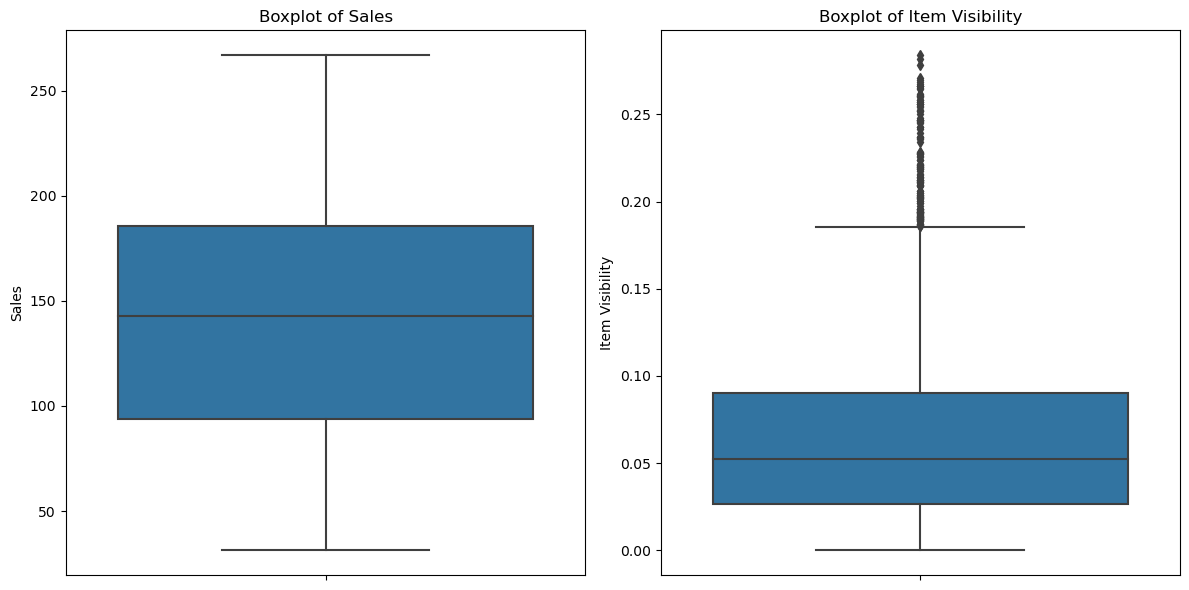

Box plots for sales and item visibility highlight any outliers that deviate significantly from the median. Investigating these outliers can provide insights into exceptional sales performances or visibility issues that require attention.


In [77]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='Sales', data=data1)
plt.title('Boxplot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(y='Item Visibility', data=data1)
plt.title('Boxplot of Item Visibility')

plt.tight_layout()
plt.show()

print("Box plots for sales and item visibility highlight any outliers that deviate significantly from the median. Investigating these outliers can provide insights into exceptional sales performances or visibility issues that require attention.")

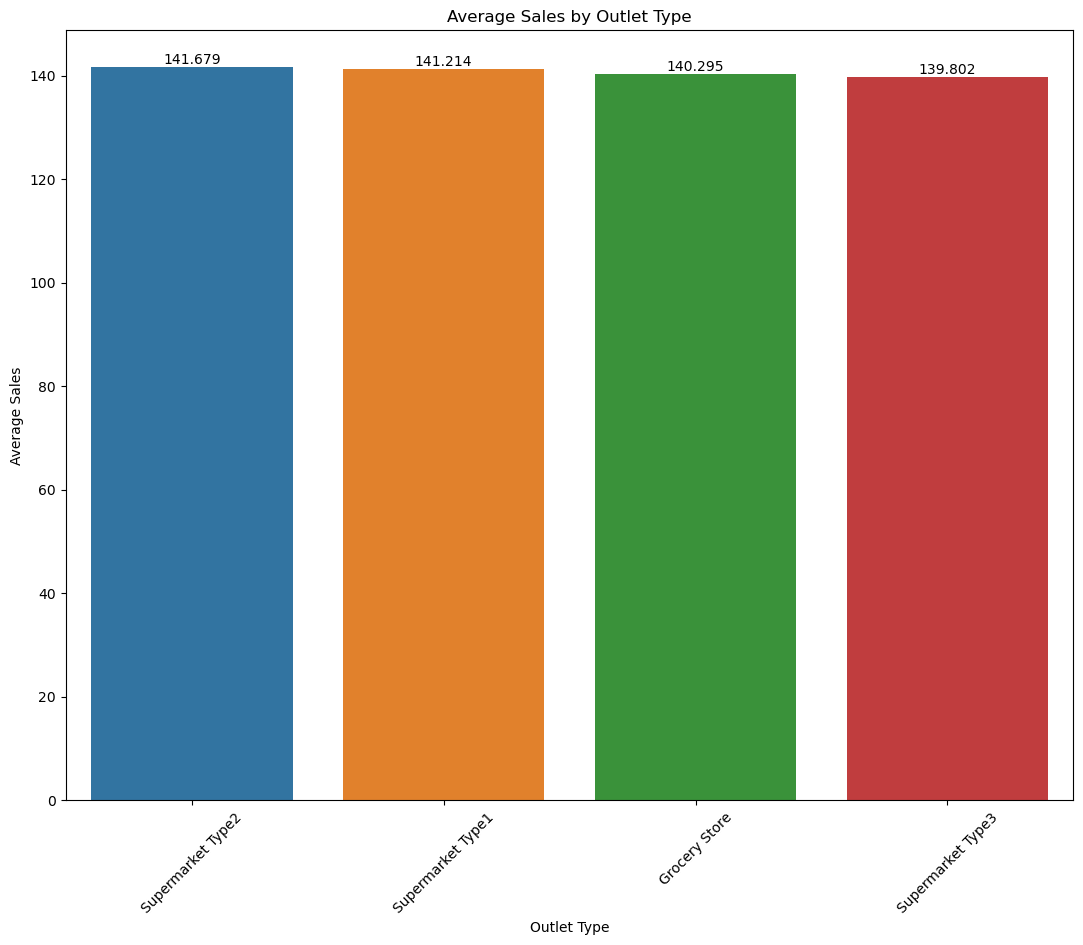

The bar plot shows the average sales across different outlet types. It highlights which outlet types, such as Supermarket Type3, have higher average sales, suggesting they are potentially more profitable.


In [78]:
avg_sales_by_outlet_type = data1.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(13,10))
ax=sns.barplot(x=avg_sales_by_outlet_type.index, y=avg_sales_by_outlet_type.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

print("The bar plot shows the average sales across different outlet types. It highlights which outlet types, such as Supermarket Type3, have higher average sales, suggesting they are potentially more profitable.")

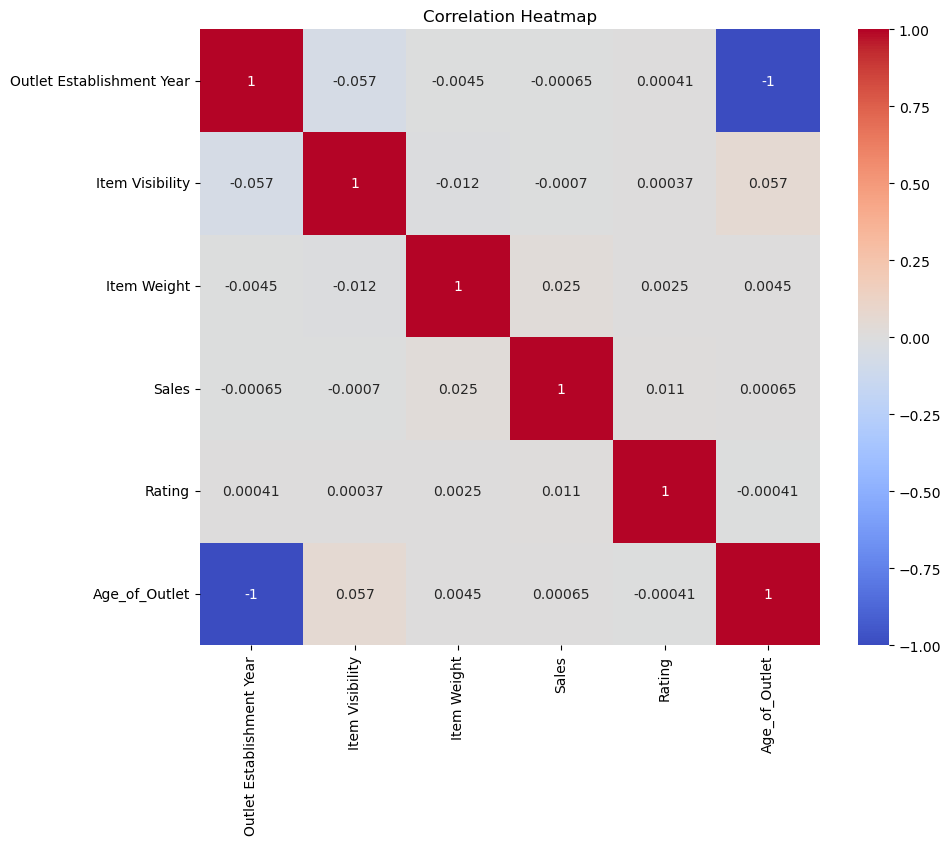

The heatmap visualizes correlations between numerical variables. Strong positive or negative correlations (closer to 1 or -1) indicate relationships that can be explored further, such as Item Weight with Sales.


In [80]:
plt.figure(figsize=(10, 8))
numeric_data1 = data1.select_dtypes(include=[np.number])
corr1 = numeric_data1.corr()
sns.heatmap(corr1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
print("The heatmap visualizes correlations between numerical variables. Strong positive or negative correlations (closer to 1 or -1) indicate relationships that can be explored further, such as Item Weight with Sales.")

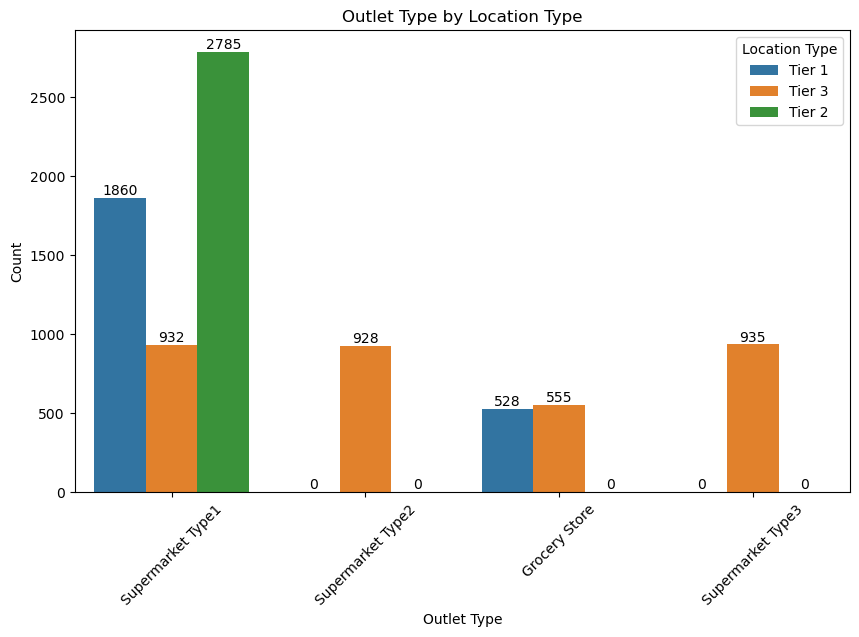

This count plot shows how different outlet types are distributed across location types (Tier 1, Tier 2, Tier 3). It helps understand where each outlet type is predominantly located, providing insights into market segmentation.


In [75]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Outlet Type', hue='Outlet Location Type', data=data1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Outlet Type by Location Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.legend(title='Location Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()

print("This count plot shows how different outlet types are distributed across location types (Tier 1, Tier 2, Tier 3). It helps understand where each outlet type is predominantly located, providing insights into market segmentation.")

In [50]:
summary_stats = data1.describe()
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
        Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000  8523.000000  8523.000000   
mean                 2016.450546         0.066132    12.857645   140.992783   
std                     3.189396         0.051598     4.226124    62.275067   
min                  2011.000000         0.000000     4.555000    31.290000   
25%                  2014.000000         0.026989     9.310000    93.826500   
50%                  2016.000000         0.053931    12.857645   143.012800   
75%                  2018.000000         0.094585    16.000000   185.643700   
max                  2022.000000         0.328391    21.350000   266.888400   

            Rating  Age_of_Outlet  
count  8523.000000    8523.000000  
mean      3.965857       7.549454  
std       0.605651       3.189396  
min       1.000000       2.000000  
25%       4.000000       6.000000  
50%       4.000000       8.000000  
75%       4.20